In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Convolution3D,MaxPooling3D
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Reshape
from keras.optimizers import SGD,RMSprop
from keras.utils import np_utils,generic_utils
from keras.layers import LSTM
from keras.optimizers import Adam
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2 
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sys

In [3]:
img_rows,img_cols,img_depth=112,112,38#定义每一帧图片的大小

learning_rate=0.0003 #学习率

weight_decay=0.0004

lstm_output_size = 180

merge = True


In [4]:
X_tr = []  # 定义一个数组变量用来存储数据集

listing =os.listdir('./HockeyFights/' )  # 导入文件列表

for vid in listing:
    vid= './HockeyFights/' +vid
   
    frames =[]  # 创建一个数组，用来存放数据
    cap =cv2.VideoCapture(vid)
    rames_num=cap.get(7)
    print(rames_num)
    ret, frame1 = cap.read()

    if merge:
        frames1 = []  # 创建一个数组，用来存放数据 
        prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
        prvs = cv2.GaussianBlur(prvs, (3, 3), 0)

    for k in range(38):
        ret,frame2 = cap.read()
        gray = cv2.resize(frame2 ,(img_rows ,img_cols),interpolation=cv2.INTER_AREA)  # 将视频的每一帧重新定义大小，INTER_AREA表示使用像素区域关系进行重采样
        gray = cv2.cvtColor(gray ,cv2.COLOR_BGR2GRAY)
        frames.append(gray)  # 将转换完的frame放入frames数组

        if merge:
            now = cv2.cvtColor(frame2, cv2.COLOR_RGB2GRAY)
            now = cv2.GaussianBlur(now, (3, 3), 0)
            hsv = np.zeros_like(frame2)
            hsv[..., 1] = 255

            # CALCULATE FLOW
            flow = cv2.calcOpticalFlowFarneback(prvs, now, None, 0.5, 3, 15, 3, 5, 1.2, 0)
            mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
            # x方向：flow[...,0]
            # y方向：flow[...,1]
            hsv[..., 0] = ang * 180 / np.pi / 2
            hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
            rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

            #cv2.imshow('frame2', rgb)

            rgb = cv2.resize(rgb, (img_rows, img_cols), interpolation=cv2.INTER_AREA)
            gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

            frames1.append(gray)  # 将转换完的frame放入frames数组

            prvs = now


        if cv2.waitKey(1 )&0xFF ==ord('q')  :  # waitKey(1)中的数字代表等待按键输入之前的无效时间,单位为毫秒,在这个时间段内按键'q'不会被记录,在这之后按键才会被记录
            break

    cap.release()  # 关闭视频文件
    cv2.destroyAllWindows()  # 关闭打开的windows窗口

    input =np.array(frames)  # 将多个一维的frames数组，变成一个多维数组
    ipt =np.rollaxis(np.rollaxis(input ,2 ,0) ,2 ,0)
    print(ipt.shape)
    ipt_1 = ipt[:,:,:19]
    ipt_2 = ipt[:,:,19:]
    # 程序运行np.rollaxis(a,2,0)时,讲轴2滚动到了轴0前面,其他轴相对2轴位置不变(start默认0),数组下标排序由0,1,2变成了1,2,0
    # print(ipt.shape)
    if merge:
        input1 = np.array(frames1)  # 将多个一维的frames数组，变成一个多维数组
        ipt1 = np.rollaxis(np.rollaxis(input1, 2, 0), 2, 0)
        ipt1_1 = ipt1[:, :, :19]
        ipt1_2 = ipt1[:, :, 19:]
        #print(np.shape(ipt1_1),np.shape(ipt1_2))
        ipt_1 = np.concatenate((ipt_1,ipt1_1),-1)
        ipt_2 = np.concatenate((ipt_2,ipt1_2),-1)
        #print(np.shape(ipt_1),np.shape(ipt_2))

    X_tr.append(ipt_1)
    X_tr.append(ipt_2)
    print(np.shape(X_tr))

41.0
(112, 112, 38)
(2, 112, 112, 38)
41.0
(112, 112, 38)
(4, 112, 112, 38)
41.0
(112, 112, 38)
(6, 112, 112, 38)
41.0
(112, 112, 38)
(8, 112, 112, 38)
41.0
(112, 112, 38)
(10, 112, 112, 38)
41.0
(112, 112, 38)
(12, 112, 112, 38)
41.0
(112, 112, 38)
(14, 112, 112, 38)
41.0
(112, 112, 38)
(16, 112, 112, 38)
41.0
(112, 112, 38)
(18, 112, 112, 38)
41.0
(112, 112, 38)
(20, 112, 112, 38)
41.0
(112, 112, 38)
(22, 112, 112, 38)
41.0
(112, 112, 38)
(24, 112, 112, 38)
41.0
(112, 112, 38)
(26, 112, 112, 38)
41.0
(112, 112, 38)
(28, 112, 112, 38)
41.0
(112, 112, 38)
(30, 112, 112, 38)
41.0
(112, 112, 38)
(32, 112, 112, 38)
41.0
(112, 112, 38)
(34, 112, 112, 38)
41.0
(112, 112, 38)
(36, 112, 112, 38)
41.0
(112, 112, 38)
(38, 112, 112, 38)
41.0
(112, 112, 38)
(40, 112, 112, 38)
41.0
(112, 112, 38)
(42, 112, 112, 38)
41.0
(112, 112, 38)
(44, 112, 112, 38)
41.0
(112, 112, 38)
(46, 112, 112, 38)
41.0
(112, 112, 38)
(48, 112, 112, 38)
41.0
(112, 112, 38)
(50, 112, 112, 38)
41.0
(112, 112, 38)
(52, 112,

(112, 112, 38)
(416, 112, 112, 38)
41.0
(112, 112, 38)
(418, 112, 112, 38)
41.0
(112, 112, 38)
(420, 112, 112, 38)
41.0
(112, 112, 38)
(422, 112, 112, 38)
41.0
(112, 112, 38)
(424, 112, 112, 38)
41.0
(112, 112, 38)
(426, 112, 112, 38)
41.0
(112, 112, 38)
(428, 112, 112, 38)
41.0
(112, 112, 38)
(430, 112, 112, 38)
41.0
(112, 112, 38)
(432, 112, 112, 38)
41.0
(112, 112, 38)
(434, 112, 112, 38)
41.0
(112, 112, 38)
(436, 112, 112, 38)
41.0
(112, 112, 38)
(438, 112, 112, 38)
41.0
(112, 112, 38)
(440, 112, 112, 38)
41.0
(112, 112, 38)
(442, 112, 112, 38)
41.0
(112, 112, 38)
(444, 112, 112, 38)
41.0
(112, 112, 38)
(446, 112, 112, 38)
41.0
(112, 112, 38)
(448, 112, 112, 38)
41.0
(112, 112, 38)
(450, 112, 112, 38)
41.0
(112, 112, 38)
(452, 112, 112, 38)
41.0
(112, 112, 38)
(454, 112, 112, 38)
41.0
(112, 112, 38)
(456, 112, 112, 38)
41.0
(112, 112, 38)
(458, 112, 112, 38)
41.0
(112, 112, 38)
(460, 112, 112, 38)
41.0
(112, 112, 38)
(462, 112, 112, 38)
41.0
(112, 112, 38)
(464, 112, 112, 38)
41.0


(112, 112, 38)
(826, 112, 112, 38)
41.0
(112, 112, 38)
(828, 112, 112, 38)
41.0
(112, 112, 38)
(830, 112, 112, 38)
41.0
(112, 112, 38)
(832, 112, 112, 38)
41.0
(112, 112, 38)
(834, 112, 112, 38)
41.0
(112, 112, 38)
(836, 112, 112, 38)
41.0
(112, 112, 38)
(838, 112, 112, 38)
41.0
(112, 112, 38)
(840, 112, 112, 38)
41.0
(112, 112, 38)
(842, 112, 112, 38)
41.0
(112, 112, 38)
(844, 112, 112, 38)
41.0
(112, 112, 38)
(846, 112, 112, 38)
41.0
(112, 112, 38)
(848, 112, 112, 38)
41.0
(112, 112, 38)
(850, 112, 112, 38)
41.0
(112, 112, 38)
(852, 112, 112, 38)
41.0
(112, 112, 38)
(854, 112, 112, 38)
41.0
(112, 112, 38)
(856, 112, 112, 38)
41.0
(112, 112, 38)
(858, 112, 112, 38)
41.0
(112, 112, 38)
(860, 112, 112, 38)
41.0
(112, 112, 38)
(862, 112, 112, 38)
41.0
(112, 112, 38)
(864, 112, 112, 38)
41.0
(112, 112, 38)
(866, 112, 112, 38)
41.0
(112, 112, 38)
(868, 112, 112, 38)
41.0
(112, 112, 38)
(870, 112, 112, 38)
41.0
(112, 112, 38)
(872, 112, 112, 38)
41.0
(112, 112, 38)
(874, 112, 112, 38)
41.0


(112, 112, 38)
(1230, 112, 112, 38)
41.0
(112, 112, 38)
(1232, 112, 112, 38)
41.0
(112, 112, 38)
(1234, 112, 112, 38)
41.0
(112, 112, 38)
(1236, 112, 112, 38)
41.0
(112, 112, 38)
(1238, 112, 112, 38)
41.0
(112, 112, 38)
(1240, 112, 112, 38)
41.0
(112, 112, 38)
(1242, 112, 112, 38)
41.0
(112, 112, 38)
(1244, 112, 112, 38)
41.0
(112, 112, 38)
(1246, 112, 112, 38)
41.0
(112, 112, 38)
(1248, 112, 112, 38)
41.0
(112, 112, 38)
(1250, 112, 112, 38)
41.0
(112, 112, 38)
(1252, 112, 112, 38)
41.0
(112, 112, 38)
(1254, 112, 112, 38)
41.0
(112, 112, 38)
(1256, 112, 112, 38)
41.0
(112, 112, 38)
(1258, 112, 112, 38)
41.0
(112, 112, 38)
(1260, 112, 112, 38)
41.0
(112, 112, 38)
(1262, 112, 112, 38)
41.0
(112, 112, 38)
(1264, 112, 112, 38)
41.0
(112, 112, 38)
(1266, 112, 112, 38)
41.0
(112, 112, 38)
(1268, 112, 112, 38)
41.0
(112, 112, 38)
(1270, 112, 112, 38)
41.0
(112, 112, 38)
(1272, 112, 112, 38)
41.0
(112, 112, 38)
(1274, 112, 112, 38)
41.0
(112, 112, 38)
(1276, 112, 112, 38)
41.0
(112, 112, 38)
(

(112, 112, 38)
(1630, 112, 112, 38)
41.0
(112, 112, 38)
(1632, 112, 112, 38)
41.0
(112, 112, 38)
(1634, 112, 112, 38)
41.0
(112, 112, 38)
(1636, 112, 112, 38)
41.0
(112, 112, 38)
(1638, 112, 112, 38)
41.0
(112, 112, 38)
(1640, 112, 112, 38)
41.0
(112, 112, 38)
(1642, 112, 112, 38)
41.0
(112, 112, 38)
(1644, 112, 112, 38)
41.0
(112, 112, 38)
(1646, 112, 112, 38)
41.0
(112, 112, 38)
(1648, 112, 112, 38)
41.0
(112, 112, 38)
(1650, 112, 112, 38)
41.0
(112, 112, 38)
(1652, 112, 112, 38)
41.0
(112, 112, 38)
(1654, 112, 112, 38)
41.0
(112, 112, 38)
(1656, 112, 112, 38)
41.0
(112, 112, 38)
(1658, 112, 112, 38)
41.0
(112, 112, 38)
(1660, 112, 112, 38)
41.0
(112, 112, 38)
(1662, 112, 112, 38)
41.0
(112, 112, 38)
(1664, 112, 112, 38)
41.0
(112, 112, 38)
(1666, 112, 112, 38)
41.0
(112, 112, 38)
(1668, 112, 112, 38)
41.0
(112, 112, 38)
(1670, 112, 112, 38)
41.0
(112, 112, 38)
(1672, 112, 112, 38)
41.0
(112, 112, 38)
(1674, 112, 112, 38)
41.0
(112, 112, 38)
(1676, 112, 112, 38)
41.0
(112, 112, 38)
(

2000
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 1, 112, 112, 64)   65728     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 1, 56, 56, 32)     0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 1, 56, 56, 128)    110720    
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 1, 28, 28, 64)     0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 784, 64)           0         
_________________________________________________________________
gru_1 (GRU)     

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1200 samples, validate on 400 samples
Epoch 1/1500
1200/1200 [==============================] - 18s 15ms/step - loss: 1.3758 - acc: 0.5975 - val_loss: 0.9338 - val_acc: 0.8175
Epoch 2/1500
1200/1200 [==============================] - 11s 9ms/step - loss: 0.7979 - acc: 0.8450 - val_loss: 0.6707 - val_acc: 0.8775
Epoch 3/1500
1200/1200 [==============================] - 11s 9ms/step - loss: 0.6630 - acc: 0.8867 - val_loss: 0.5908 - val_acc: 0.8975
Epoch 4/1500
1200/1200 [==============================] - 11s 9ms/step - loss: 0.5819 - acc: 0.9058 - val_loss: 0.5462 - val_acc: 0.9025
Epoch 5/1500
1200/1200 [==============================] - 11s 9ms/step - loss: 0.5212 - acc: 0.9200 - val_loss: 0.5016 - val_acc: 0.9150
Epoch 6/1500
1200/1200 [==============================] - 11s 9ms/step - loss: 0.4853 - acc: 0.9275 - val_loss: 0.4745 - val_acc: 0.9200
Epoch 7/1500
1200/1200 [==============================] - 11s 9ms/step - loss: 0.4388 - acc: 0.9408 - val_loss: 0.4437 - val_acc: 

PermissionError: [Errno 13] Permission denied: 'loss_curve.pdf'

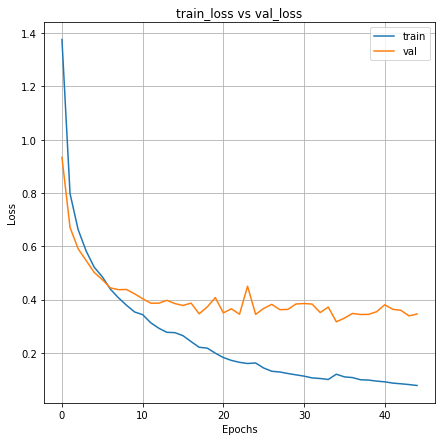

In [5]:
X_tr_array=np.array(X_tr)#将所有的数据整合成一个数组
num_samples=len(X_tr_array)#数据的总量（以15帧视频为一个完整的数据）
print(num_samples)

label=np.ones((num_samples),dtype=int)#将所有数据的标签都设置成1
label[0:1000]=0    #对每个分类做标签
label[1000:]=1  #对每个分类做标签

train_data=[X_tr_array,label] #数据的格式是有数组和标注组成的

(X_train,y_train)=(train_data[0],train_data[1])

train_set = np.zeros((num_samples, 1, img_rows,img_cols,img_depth))

for h in range(num_samples):
    train_set[h][0][:][:][:]=X_train[h,:,:,:]

#train_set = np.expand_dims(X_train, axis=1)
patch_size = img_depth  #以30张图片为一个完整输入数据
batch_size = 128
nb_classes = 2   #所有视频总共分为6种行为
nb_epoch =1500    #总共进行200次评估

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes) #将整型标签转为onehot类型数据


# number of convolutional filters to use at each layer
nb_filters = [32, 32]

# level of pooling to perform at each layer (POOL x POOL)
nb_pool = [3, 3]

# level of convolution to perform at each layer (CONV x CONV)
nb_conv = [5,5]

# Pre-processing
train_set = train_set.astype('float32') #将train_set转换成浮点类型
train_set -= np.mean(train_set) #图像的去均值操作，去掉图片中一些没用的信息，如亮度等，突出要识别的信息
train_set /=np.max(train_set) #数据的归一化处理，保证所有的数据归一化之后都在0—1之间



# Define model

model = Sequential()
model.add(Convolution3D(64,kernel_size=(3,3,3),strides=(1,1,1),activation='relu',padding='same',input_shape=(1,img_rows,img_cols,patch_size),
                       kernel_regularizer=l2(weight_decay)))
model.add(MaxPooling3D(pool_size=(2,2,2),strides=None,padding='valid',data_format='channels_first'))
model.add(Convolution3D(128,kernel_size=(3,3,3),strides=(1,1,1),activation='relu',padding='same',kernel_regularizer=l2(weight_decay)))
model.add(MaxPooling3D(pool_size=(2,2,2),strides=None,padding='valid',data_format='channels_first'))
model.add(Reshape((784,64)))

model.add(GRU(128,activation='tanh',return_sequences=True))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_regularizer=l2(weight_decay)))
model.add(Dropout(0.2))
model.add(Dense(100,activation='relu',kernel_regularizer=l2(weight_decay)))
model.add(Dropout(0.2))
model.add(Dense(nb_classes,activation='softmax'))
adam=Adam(lr=learning_rate)
model.summary()
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

# Split the data
# train:val:test = 6:2:2
X_train_new, X_test_new, y_train_new,y_test_new =  train_test_split(train_set, Y_train, test_size=0.2, random_state=42)
X_train_new, X_val_new, y_train_new,y_val_new =  train_test_split(X_train_new, y_train_new, test_size=0.25, random_state=7)


# checkpoint
checkpoint = ModelCheckpoint('model.h5', monitor='acc', verbose=0, save_best_only=True, mode='max')#保存最好的模型
earlystop = EarlyStopping(patience=10, min_delta=1e-10) #早停
callbacks_list = [checkpoint, earlystop] 

# Train the model
hist = model.fit(X_train_new, y_train_new, validation_data=(X_val_new,y_val_new),callbacks=callbacks_list,
          batch_size=batch_size,nb_epoch = nb_epoch,shuffle=True)
#训练模型，训练集是X_train_new，答案是y_train_new，validation_data代表的测试集，shuffle代表是否打乱顺序重新组成训练集和测试集



# Evaluate the model
score = model.evaluate(X_test_new, y_test_new, batch_size=batch_size) #测试集的得分就是最终的评估标准
print('Test loss:', score[0])
print('Test accuracy:', score[1])


# Plot the results
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['acc']
val_acc = hist.history['val_acc']

plt.figure(figsize=(7,7))
plt.grid()
plt.plot(train_loss)
plt.plot(val_loss)
plt.ylabel('Loss')
plt.title('train_loss vs val_loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.savefig("loss_curve.pdf")
plt.show()

plt.figure(figsize=(7,7))
plt.ylim(0,1.1)
plt.grid()
plt.plot(train_acc)
plt.plot(val_acc)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('train_acc vs val_acc')
plt.legend(['train', 'val'])
plt.savefig("acc_curve.pdf")
plt.show()

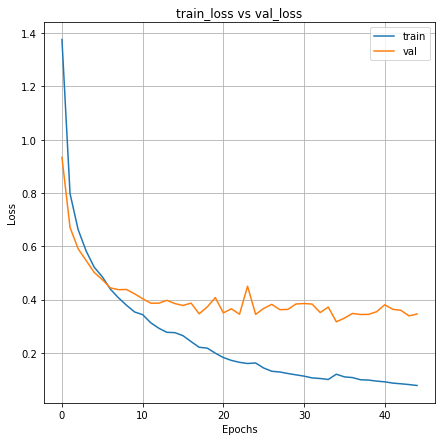

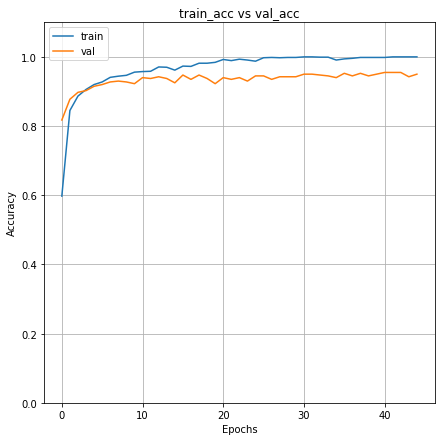

In [7]:
# Plot the results
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['acc']
val_acc = hist.history['val_acc']

plt.figure(figsize=(7,7))
plt.grid()
plt.plot(train_loss)
plt.plot(val_loss)
plt.ylabel('Loss')
plt.title('train_loss vs val_loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper right')
plt.savefig("loss_curve1.pdf")
plt.show()

plt.figure(figsize=(7,7))
plt.ylim(0,1.1)
plt.grid()
plt.plot(train_acc)
plt.plot(val_acc)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('train_acc vs val_acc')
plt.legend(['train', 'val'])
plt.savefig("acc_curve1.pdf")
plt.show()

In [8]:
# Evaluate the model
score = model.evaluate(X_test_new, y_test_new, batch_size=batch_size) #测试集的得分就是最终的评估标准
print('Test loss:', score[0])
print('Test accuracy:', score[1])

400/400 [==============================] - 2s 4ms/step
Test loss: 0.2081610456109047
Test accuracy: 0.965
